In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, datasets, preprocessing, metrics
import spotipy
from matplotlib import pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline 

In [46]:
audio_feats = pd.read_csv('../../Dropbox/datasets/audio_feats.csv')
X = audio_feats.drop('popularity', axis=1)


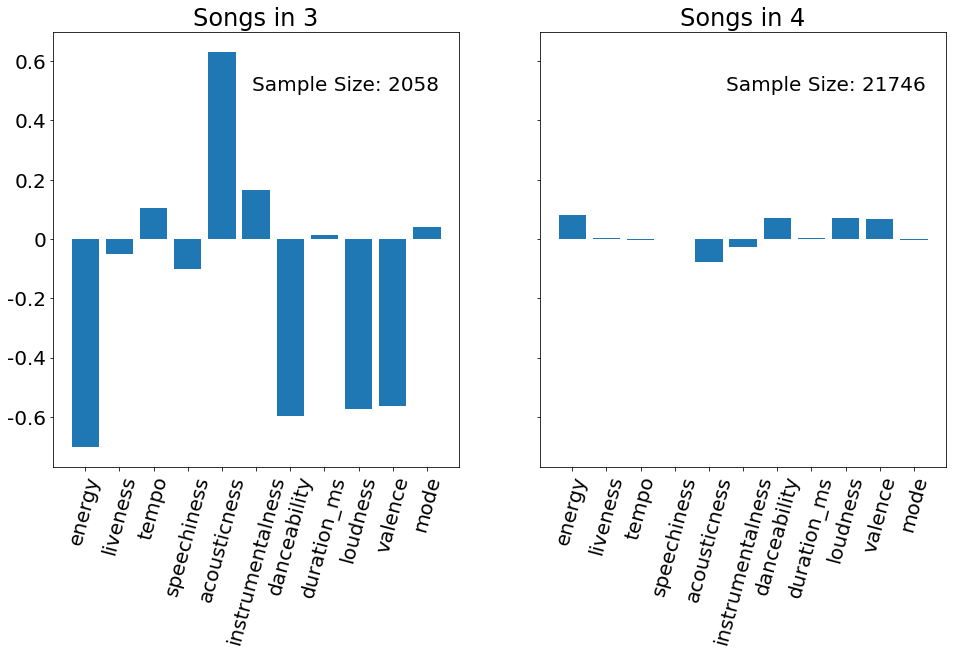

In [47]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(16,8))
for i, n in enumerate(['t_3.0', 't_4.0']):
    y1=X[X[n]==1].groupby(n)[X.iloc[:,0:11].columns].mean().T[1].values
    x1=[0,1,2,3,4,5,6,7,8,9,10]
    axes[i].bar(x1, y1, align='center')
    axes[i].set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    axes[i].set_xticklabels(X[X[n]==1].groupby(n)[X.iloc[:,0:11].columns].mean().T[1].index, rotation=75, size =20,)
    axes[i].set_yticklabels([-.8,-.6, -.4, -.2,0,.2,.4,.6, .8],size=20)
    axes[i].set_title(n, size = 24)
    if n == 't_3.0':
        axes[i].set_title('Songs in 3', size = 24)
    else:
        axes[i].set_title('Songs in 4', size = 24)
    axes[i].annotate('Sample Size: {}'.format(X[X[n]==1].shape[0]), xy=(.95, .9), xycoords='axes fraction', fontsize=20,
                horizontalalignment='right', verticalalignment='top'
            
            
            )
plt.show()
fig.savefig('../DSI---Capstone-Project/Time_Sig.png', bbox_inches='tight')
plt.close(fig)   

In [48]:
from scipy import stats

In [49]:
p_means = X.iloc[:,0:11].mean().values

In [50]:
# X = X.iloc[:,0:11]

In [51]:
# for col in X.columns:
X[X['t_3.0']==1].loc[:,'energy'].mean()

-0.7015964600395538

In [69]:
t_test = []
for i, col in enumerate(X.iloc[:,0:11].columns):
    t_test.append(stats.ttest_1samp(X[X['t_3.0']==1].loc[:, col], p_means[i], axis=0))

In [77]:
df=pd.DataFrame(t_test)
df.index=X.iloc[:,0:11].columns


In [78]:
df

,statistic,pvalue
energy,-28.740626,5.293927e-153
liveness,-2.317849,2.055522e-02
tempo,4.199031,2.794888e-05
speechiness,-3.999116,6.582570e-05
acousticness,23.921520,8.747165e-112
instrumentalness,6.799896,1.367389e-11
danceability,-29.962228,5.452657e-164
duration_ms,0.603675,5.461263e-01
loudness,-20.068276,5.886221e-82
valence,-29.214458,3.050049e-157
